# **Cleaning Flats Data**  


- ## Pre-processing steps for merging datasets

 1. **Load the flats dataset**


 2. **Clean the flats dataset**


 3. Load the houses dataset


 4. Clean the houses dataset


 5. Merge the cleaned datasets


 6. Perform a second round of cleaning on the merged dataset


 7. Save the cleaned dataset
---

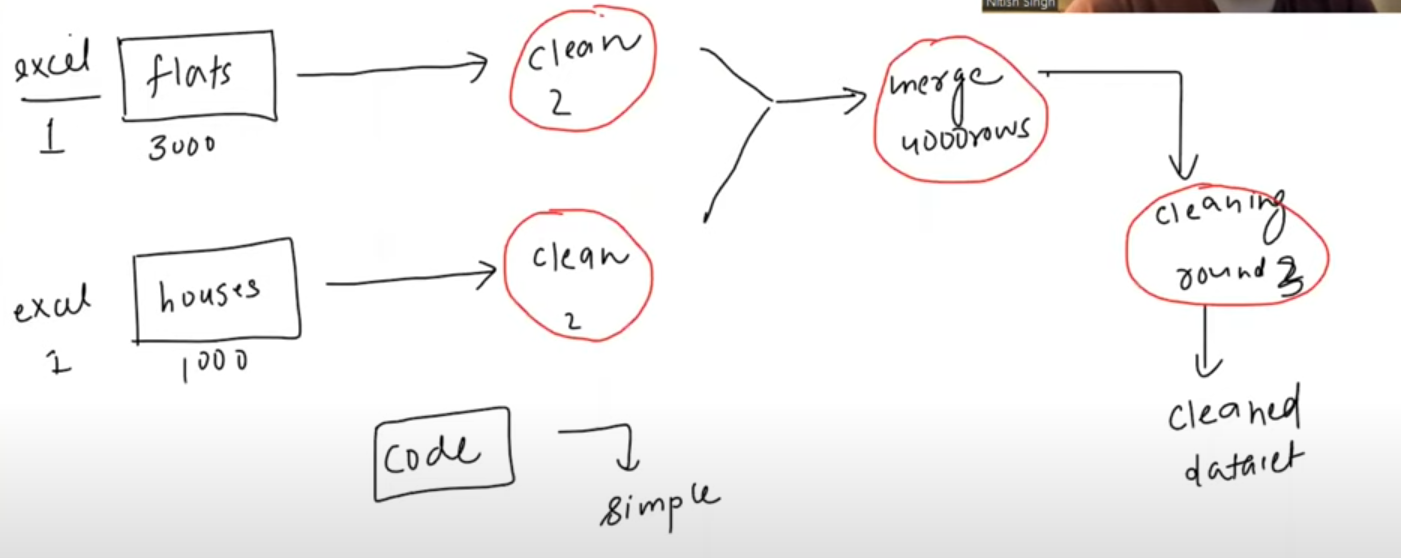

---





In [64]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

---
## Load data

In [65]:
input_file = '../data/scrap-data/flats.csv'
outut_file = '../data/clean-data/flats.csv'
df = pd.read_csv('../data/scrap-data/flats.csv')
df.sample(5)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
2344,2 BHK Flat in Sector 107 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Signature Global Solera3.7 ★,40 Lac,"₹ 6,644/sq.ft.",Super Built up area 602(55.93 sq.m.)Carpet are...,2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Sector 107, Sector 107 Gurgaon, Gurgaon, Haryana",7th of 7 Floors,NaN,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""...",Best in class property available at sector 107...,"['3 Fan', '1 Exhaust Fan', '5 Light', '1 Modul...",NaN,"['Green Area4.5 out of 5', 'Construction4.5 ou...",V69442008
2166,2 BHK Flat in Sector 68 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Supertech Hues,80 Lac,"₹ 6,779/sq.ft.",Built Up area: 1180 (109.63 sq.m.),2 Bedrooms,2 Bathrooms,3+ Balconies,NaN,"Sector 68 Gurgaon, Gurgaon, Haryana",14th of 24 Floors,NaN,0 to 1 Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...","Ready to move in appartment, fully furnished i...","['2 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Environment4 out of 5', 'Lifestyle4 out of 5...",V69809542
2689,3 BHK Flat in Sector 109 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Brisk Lumbini Terrace Homes,1.5 Crore,"₹ 6,616/sq.ft.",Carpet area: 2267 (210.61 sq.m.),3 Bedrooms,3 Bathrooms,1 Balcony,Servant Room,"Sector 109 Gurgaon, Gurgaon, Haryana",4th of 10 Floors,North,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Ram Mandir', 'K...",One of the best location of dwarka expressway,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...","['Environment5 out of 5', 'Safety4.5 out of 5'...",E68931654
1625,4 BHK Flat in Sector 37D Gurgaon,https://www.99acres.com/4-bhk-bedroom-apartmen...,BPTP Terra3.8 ★,1.78 Crore,"₹ 8,124/sq.ft.",Super Built up area 2191(203.55 sq.m.),4 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,"Plc Unit, Sector 37D Gurgaon, Gurgaon, Haryana",10th of 23 Floors,East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...","Plc paid unit, best view for immediate sale.Bp...","['3 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4.5 out of 5', 'Construction4.5 ou...",X67372260
1480,2 BHK Flat in Sector 79 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Godrej 1014.0 ★,1.34 Crore,"₹ 8,524/sq.ft.",Super Built up area 1572(146.04 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Aa1, Sector 79 Gurgaon, Gurgaon, Haryana",2nd of 15 Floors,North-West,1 to 5 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road',...",This beautiful 2 bhk flat in sector 79 gurgaon...,[],"['Centrally Air Conditioned', 'Security / Fire...","['Green Area5 out of 5', 'Construction5 out of...",J69483440


In [3]:
# shape
df.shape

(3017, 20)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3017 non-null   object
 1   link             3017 non-null   object
 2   society          3016 non-null   object
 3   price            3007 non-null   object
 4   area             3004 non-null   object
 5   areaWithType     3008 non-null   object
 6   bedRoom          3008 non-null   object
 7   bathroom         3008 non-null   object
 8   balcony          3008 non-null   object
 9   additionalRoom   1694 non-null   object
 10  address          3002 non-null   object
 11  floorNum         3006 non-null   object
 12  facing           2127 non-null   object
 13  agePossession    3007 non-null   object
 14  nearbyLocations  2913 non-null   object
 15  description      3008 non-null   object
 16  furnishDetails   2203 non-null   object
 17  features         2594 non-null   

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum()

property_name         0
link                  0
society               1
price                10
area                 13
areaWithType          9
bedRoom               9
bathroom              9
balcony               9
additionalRoom     1323
address              15
floorNum             11
facing              890
agePossession        10
nearbyLocations     104
description           9
furnishDetails      814
features            423
rating              341
property_id           9
dtype: int64

In [7]:
# Columns to drop -> property_name, link, property_id
df.drop(columns=['link','property_id'], inplace=True)
df.head()

,property_name,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [8]:
# rename columns
df.rename(columns={'area':'price_per_sqft'},inplace=True)
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## society

In [9]:

df['society'].value_counts()

society
SS The Leaf3.8 ★                                     73
Tulip Violet4.3 ★                                    40
Shapoorji Pallonji Joyville Gurugram4.0 ★            39
Signature Global Park4.0 ★                           36
Shree Vardhman Victoria3.8 ★                         35
Tulip Violet4.2 ★                                    33
Emaar MGF Emerald Floors Premier3.8 ★                32
Smart World Orchard                                  32
Smart World Gems                                     32
Paras Dews                                           31
DLF The Ultima4.0 ★                                  31
DLF Regal Gardens3.9 ★                               30
M3M Woodshire4.0 ★                                   29
Shree Vardhman Flora3.8 ★                            29
La Vida by Tata Housing                              28
Signature Global Solera3.7 ★                         28
Godrej Nature Plus                                   27
Emaar Gurgaon Greens4.1 ★               

In [10]:
df['society'].value_counts().shape

(638,)

In [11]:
import re
df['society'] = df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [12]:
df[['society']].sample(5)

,society
565,bestech park view grand spa
2225,malibu towers
2594,m3m soulitude
958,shapoorji pallonji joyville gurugram
265,godrej aria


In [13]:
df['society'].value_counts().shape

(604,)

In [14]:
df['society'].value_counts()

society
tulip violet                                     75
ss the leaf                                      74
shapoorji pallonji joyville gurugram             45
dlf new town heights                             38
signature global park                            36
shree vardhman victoria                          35
smart world orchard                              32
emaar mgf emerald floors premier                 32
smart world gems                                 32
paras dews                                       31
dlf the ultima                                   31
m3m woodshire                                    30
dlf regal gardens                                30
shree vardhman flora                             29
la vida by tata housing                          28
signature global solera                          28
godrej nature plus                               27
bptp terra                                       25
emaar gurgaon greens                             25
expe

In [15]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## price

In [16]:
# price
df['price'].value_counts()

price
1.25 Crore          79
1.1 Crore           61
1.4 Crore           60
1.5 Crore           59
1.2 Crore           59
90 Lac              58
1.3 Crore           57
95 Lac              53
2 Crore             51
1.75 Crore          47
1 Crore             46
1.6 Crore           43
1.35 Crore          41
1.55 Crore          40
1.9 Crore           40
75 Lac              38
1.65 Crore          38
1.8 Crore           37
1.7 Crore           37
80 Lac              36
2.2 Crore           34
50 Lac              33
1.15 Crore          33
1.45 Crore          31
85 Lac              31
1.05 Crore          30
2.5 Crore           29
60 Lac              29
40 Lac              29
2.1 Crore           26
45 Lac              26
65 Lac              25
35 Lac              23
2.35 Crore          23
1.85 Crore          23
3 Crore             22
70 Lac              21
55 Lac              20
2.25 Crore          20
3.5 Crore           19
2.4 Crore           18
2.3 Crore           18
30 Lac              17
2.65 

In [17]:
df[df['price'] == 'Price on Request']

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
25,5 BHK Flat in Sector 1 Gurgaon,the new people apartments,Price on Request,NaN,Built Up area: 4500 (418.06 sq.m.),5 Bedrooms,1 Bathroom,No Balcony,NaN,"Sector 1, Sector 1 Gurgaon, Gurgaon, Haryana",Ground of 1 Floors,NaN,undefined,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Best in class property available at sector 1 l...,NaN,NaN,NaN
1644,4 BHK Flat in Sector 50 Gurgaon,ss hibiscus,Price on Request,NaN,Carpet area: 4800 (445.93 sq.m.),4 Bedrooms,4 Bathrooms,3 Balconies,Servant Room,"Sector 50 Gurgaon, Gurgaon, Haryana",7th of 18 Floors,East,5 to 10 Year Old,"['Baani Square', 'SS Plaza', 'Good Earth City ...",4bedroom 4800sq.Ft middle floor apartment avai...,"['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Lift(s)', 'Water purifier', 'Swimming Pool',...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
1972,1 BHK Flat in Sector 31 Gurgaon,raheja atlantis,Price on Request,NaN,Carpet area: 650 (60.39 sq.m.),1 Bedroom,1 Bathroom,1 Balcony,"Pooja Room,Study Room,Servant Room","Yes, Sector 31 Gurgaon, Gurgaon, Haryana",3rd of 15 Floors,East,0 to 1 Year Old,"['Huda Metro Station', 'Reliance Fresh, Indira...",It is my property and good condition and good ...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4 out of 5', 'Construction4 out of..."
2054,2 BHK Flat in Sector 79 Gurgaon,supertech araville,Price on Request,NaN,Built Up area: 1295 (120.31 sq.m.),2 Bedrooms,2 Bathrooms,No Balcony,NaN,"Sector 79, Sector 79 Gurgaon, Gurgaon, Haryana",15th of 15 Floors,NaN,undefined,NaN,"2 bath, unfurnished, 15th floor (Of 18), super...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5..."
2357,2 BHK Flat in Sector 37D Gurgaon,the millennia 2,Price on Request,NaN,Carpet area: 552 (51.28 sq.m.),2 Bedrooms,1 Bathroom,1 Balcony,NaN,"Sector 37D Gurgaon, Gurgaon, Haryana",13rd of 13 Floors,NaN,undefined,"['Shri Balaji Hospital and Trauma Center', 'Sh...","1 bath, unfurnished, 13th floor (Of 13), at se...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
2522,2 BHK Flat in Sector 95A Gurgaon,the roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14th of 14 Floors,NaN,undefined,NaN,Best in class property available at sector 95a...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4.5 out of..."
2549,3 BHK Flat in Sector-2 Sohna,supertech hilltown,Price on Request,NaN,Built Up area: 1720 (159.79 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,NaN,"Sohna Sector 2,gurgaon, Sector-2 Sohna, Gurgao...",4th of 4 Floors,North-East,undefined,NaN,"3 bath, unfurnished, 4th floor (Of 4), overloo...",NaN,NaN,NaN
2640,2 BHK Flat in Sector 95A Gurgaon,the roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14th of 14 Floors,NaN,undefined,NaN,Best in class property available at sector 95a...,NaN,NaN,"['Environment5 out of 5', 'Safety5 out of 5', ..."
2959,3 BHK Flat in Sector 104 Gurgaon,godrej summit,Price on Request,NaN,Super Built up area 1647(153.01 sq.m.)Carpet a...,3 Bedrooms,3 Bathrooms,3 Balconies,NaN,"1402, Sector 104 Gurgaon, Gurgaon, Haryana",14th of 17 Floors,NaN,1 to 5 Year Old,"['MG Road Metro Station', 'The Esplanade Mall'...",We are the proud owners of this 3 bhk apartmen...,[],"['Intercom Facility', 'Lift(s)', 'Maintenance ...","['Management3 out of 5', 'Green Area4.5 out of..."
2972,4 BHK Flat in Gwal Pahari,krrish provence estate,Price on Request,NaN,Built Up area: 5800 (538.84 sq.m.),4 Bedrooms,5 Bathrooms,1 Balcony,NaN,"Gwal Pahari, Gurgaon, Haryana",17th of 24 Floors,NaN,Under Construction,"['Tniy Toons School', 'Pathways School Gurgoan...",Residential apartment for sell.Located on 17th...,NaN,NaN,NaN


In [18]:
df = df[df['price'] != 'Price on Request']

In [19]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [20]:
df['price'].head()

0        45 Lac
1        50 Lac
2        40 Lac
3    1.47 Crore
4        70 Lac
Name: price, dtype: object

In [21]:
def treat_price(x):
    if type(x) == float:
        return x
    else:
        # Check if x has at least 2 elements
        if len(x) > 1 and x[1] == 'Lac':
            return round(float(x[0]) / 100, 2)
        elif len(x) > 0:  # Check if x has at least 1 element
            try:
                return round(float(x[0]), 2)  # Attempt to convert to float
            except ValueError:
                return None  # Return None if conversion fails
        return None  # Return None if x is not valid

In [22]:
df['price'] = df['price'].str.split(' ').apply(treat_price)
df.head(5)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## price_per_sqft

In [23]:
# price_per_sqft
df['price_per_sqft'].value_counts()

price_per_sqft
₹ 10,000/sq.ft.     19
₹ 8,000/sq.ft.      16
₹ 12,500/sq.ft.     16
₹ 6,666/sq.ft.      13
₹ 5,000/sq.ft.      13
₹ 7,500/sq.ft.      12
₹ 8,333/sq.ft.      12
₹ 6,000/sq.ft.      11
₹ 8,461/sq.ft.       9
₹ 12,000/sq.ft.      8
₹ 7,000/sq.ft.       8
₹ 9,000/sq.ft.       7
₹ 9,230/sq.ft.       6
₹ 8,928/sq.ft.       6
₹ 5,500/sq.ft.       6
₹ 11,500/sq.ft.      6
₹ 11,111/sq.ft.      6
₹ 6,578/sq.ft.       6
₹ 8,888/sq.ft.       6
₹ 8,205/sq.ft.       5
₹ 7,692/sq.ft.       5
₹ 8,571/sq.ft.       5
₹ 4,666/sq.ft.       5
₹ 5,556/sq.ft.       5
₹ 4,615/sq.ft.       5
₹ 7,641/sq.ft.       5
₹ 5,384/sq.ft.       5
₹ 14,242/sq.ft.      5
₹ 7,142/sq.ft.       5
₹ 10,714/sq.ft.      5
₹ 4,444/sq.ft.       5
₹ 5,600/sq.ft.       5
₹ 7,407/sq.ft.       5
₹ 6,500/sq.ft.       5
₹ 11,428/sq.ft.      5
₹ 16,000/sq.ft.      5
₹ 7,250/sq.ft.       4
₹ 9,822/sq.ft.       4
₹ 13,913/sq.ft.      4
₹ 5,660/sq.ft.       4
₹ 8,043/sq.ft.       4
₹ 8,500/sq.ft.       4
₹ 9,210/sq.ft.     

In [24]:
df[df['price_per_sqft'].isna()]

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
18,2 BHK Flat in Sector 93 Gurgaon,signature global orchard avenue 2,NaN,NaN,Carpet area: 577.11 (53.62 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"L-1104, Sector 93 Gurgaon, Gurgaon, Haryana",11st of 14 Floors,East,Under Construction,"['Huda Metro Station', 'V3S Sapphire Ninety', ...",Looking for a budget-Friendly 2 bhk flat in a ...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN
2849,2 BHK Flat in Sector 107 Gurgaon,signature global solera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['price_per_sqft'] = (
    df['price_per_sqft']
    .str.split('/')
    .str.get(0)
    .str.replace('₹', '')
    .str.replace(',', '')
    .str.strip()
)
# Filter out non-numeric values before conversion
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

In [26]:
df.sample(2)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
2078,3 BHK Flat in Sector 37D Gurgaon,signature global city,1.10,8494.0,Carpet area: 1295 (120.31 sq.m.),3 Bedrooms,3 Bathrooms,2 Balconies,NaN,"Sector 37D Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,North,Mar 2025,"['Sapphire 83 Mall Sector 83', 'Dwarka Express...",Bang on dwarka express way 3 bhk koi unit avai...,"['3 Fan', '6 Light', '3 AC', '1 Chimney', '1 W...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
1613,3 BHK Flat in Sector 56 Gurgaon,guru gram haryana cghs,1.39,7227.0,Super Built up area 1920(178.37 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Study Room,"000, Sector 56 Gurgaon, Gurgaon, Haryana",4th of 10 Floors,North,5 to 10 Year Old,"['Sector metro station', 'Sector metro station...",Brokers please excuse\n3 bhk +study room resid...,"['3 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Water purifier', 'Security / Fire Alarm', 'P...","['Green Area4 out of 5', 'Construction4 out of..."


---
## bedrooms

In [27]:
# bedrooms
df['bedRoom'].value_counts()

bedRoom
3 Bedrooms    1437
2 Bedrooms     944
4 Bedrooms     478
1 Bedroom      104
5 Bedrooms      31
6 Bedrooms       3
Name: count, dtype: int64

In [28]:
df[df['bedRoom'].isnull()]

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
2849,2 BHK Flat in Sector 107 Gurgaon,signature global solera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2850,4 BHK Flat in Sector 53 Gurgaon,tulip monsella,NaN,33198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2851,2 BHK Flat in New Palam Vihar,my home,NaN,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2852,2 BHK Flat in Sohna,breez global hill view,NaN,5470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2922,3 BHK Flat in Sector 99A Gurgaon,pareena coban residences,NaN,5759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2923,1 BHK Flat in Golf Course Ext Road,ikon tower baani city centre,NaN,12437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2924,2 BHK Flat in Sector 89 Gurgaon,greenopolis,NaN,4820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2926,4 BHK Flat in C Block Sushant Lok Phase 1,maple heights,NaN,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927,2 BHK Flat in Sector 99 Gurgaon,assotech blith,NaN,6593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df[~df['bedRoom'].isnull()]

In [30]:
df['bedRoom'] = df['bedRoom'].str.split(' ').str.get(0)
df['bedRoom'] = pd.to_numeric(df['bedRoom'], errors='coerce')

In [31]:
df['bedRoom'].value_counts()

bedRoom
3    1437
2     944
4     478
1     104
5      31
6       3
Name: count, dtype: int64

In [32]:
df.sample(2)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
372,2 BHK Flat in Sector 108 Gurgaon,raheja vedaanta,0.7,4651.0,Super Built up area 1505(139.82 sq.m.),2,2 Bathrooms,2 Balconies,NaN,"Sector 108 Gurgaon, Gurgaon, Haryana",12nd of 22 Floors,South,5 to 10 Year Old,NaN,Enjoy the sun through the south facing windows...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Li...","['Power Back-up', 'Feng Shui / Vaastu Complian...","['Green Area4 out of 5', 'Construction4 out of..."
2254,2 BHK Flat in Sector 108 Gurgaon,raheja the vedaanta floors,0.7,4521.0,Carpet area: 1548 (143.81 sq.m.),2,2 Bathrooms,3 Balconies,NaN,"Sector 108 Gurgaon, Gurgaon, Haryana",1st of 5 Floors,NaN,5 to 10 Year Old,"['Sec21 Dwarka Metro Station', 'The Shikshiyan...",Park and sun facing during winter,"['1 Wardrobe', '1 Water Purifier', '1 Fan', '1...",NaN,"['Environment4 out of 5', 'Lifestyle4.5 out of..."


---
## bathroom

In [33]:
df['bathroom'].value_counts()

bathroom
2 Bathrooms    1044
3 Bathrooms     989
4 Bathrooms     636
5 Bathrooms     169
1 Bathroom      112
6 Bathrooms      42
7 Bathrooms       5
Name: count, dtype: int64

In [34]:
df['bathroom'].isnull().sum()

0

In [35]:
df[['bathroom']].sample(3)

,bathroom
2882,2 Bathrooms
1807,4 Bathrooms
765,4 Bathrooms


In [36]:
df['bathroom'] = df['bathroom'].str.split(' ').str.get(0)
df['bathroom'] = pd.to_numeric(df['bathroom'], errors='coerce')

In [37]:
df.sample(2)

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
2480,3 BHK Flat in Sector 104 Gurgaon,zara aavaas,0.65,8519.0,Carpet area: 763 (70.89 sq.m.),3,2,2 Balconies,NaN,"Sector 104 Gurgaon, Gurgaon, Haryana",7th of 11 Floors,NaN,Within 3 months,"['Ardee Mall', 'Northern Peripheral Road', 'Mp...","Near to gurugram railway station, school, hosp...",[],"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2943,2 BHK Flat in Sector 22 Gurgaon,ambience creacions,1.75,12700.0,Super Built up area 1380(128.21 sq.m.),2,2,2 Balconies,NaN,"Tower C, Sector 22 Gurgaon, Gurgaon, Haryana",11st of 20 Floors,NaN,Nov 2023,"['Moulsari Avenue', 'Ambience Mall', 'Old Delh...",Great location-Close to udyog vihar and oberoi...,"['5 Fan', '6 Light', '4 AC', '1 Modular Kitche...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Safety5 out of 5', 'Lifestyle4 out of 5', 'E..."


---
## balcony

In [38]:
df['balcony'].value_counts()

balcony
3 Balconies     974
3+ Balconies    862
2 Balconies     749
1 Balcony       315
No Balcony       97
Name: count, dtype: int64

In [39]:
df['balcony'].isnull().sum()

0

In [40]:
df['balcony'] = df['balcony'].str.split(' ').str.get(0).str.replace('No','0')

In [41]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## additionalRoom

In [42]:
# additionalRoom
df['additionalRoom'].value_counts()

additionalRoom
Servant Room                                     629
Study Room                                       232
Others                                           179
Pooja Room                                       132
Study Room,Servant Room                           81
Store Room                                        76
Pooja Room,Servant Room                           60
Servant Room,Others                               52
Servant Room,Pooja Room                           30
Study Room,Others                                 27
Pooja Room,Study Room,Servant Room,Others         25
Pooja Room,Study Room,Servant Room                24
Servant Room,Store Room                           19
Pooja Room,Study Room                             13
Pooja Room,Study Room,Servant Room,Store Room     12
Study Room,Pooja Room                              8
Servant Room,Study Room                            8
Study Room,Servant Room,Store Room                 7
Pooja Room,Store Room          

In [43]:
df['additionalRoom'].value_counts().shape

(49,)

In [44]:
df['additionalRoom'].isnull().sum()

1305

In [45]:
df['additionalRoom'].fillna('not available',inplace=True)

/tmp/ipykernel_230012/1615843200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additionalRoom'].fillna('not available',inplace=True)


In [46]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [47]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## floorNum

In [48]:
# floor num
df['floorNum'].head()

0      4th   of 4 Floors
1      1st   of 3 Floors
2    12nd   of 14 Floors
3      2nd   of 4 Floors
4      5th   of 8 Floors
Name: floorNum, dtype: object

In [49]:
df['floorNum'].isnull().sum()

2

In [50]:
df[df['floorNum'].isnull()]

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
181,3 BHK Flat in Dwarka Expressway Gurgaon,experion heartsong,1.08,6150.0,Built Up area: 1758 (163.32 sq.m.),3,3,0,not available,"604, Tower B-3, 6th Floor,Sector 108, Dwarka E...",NaN,NaN,Under Construction,NaN,A property by one of the most reputed builders...,[],NaN,NaN
2766,2 BHK Flat in Sector 78 Gurgaon,nan,0.60,3692.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,not available,"Gurgaon, Sector 78 Gurgaon, Gurgaon, Haryana",NaN,NaN,Under Construction,NaN,The property is under construction it's by rah...,[],NaN,"['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."


In [51]:
df['floorNum'] = df['floorNum'].str.split(' ').str.get(0).replace('Ground','0').str.replace('Basement','-1').str.replace('Lower','0').str.extract(r'(\d+)')

In [52]:
df.head()

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


---
## facing

In [53]:
# facing
df['facing'].value_counts()

facing
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [54]:
df['facing'].isnull().sum()

874

In [55]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipykernel_230012/3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [56]:
df['facing'].value_counts()

facing
NA            874
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [57]:
df.insert(loc=4,column='area',value=round((df['price']*10000000)/df['price_per_sqft']))

In [58]:
df.insert(loc=1,column='property_type',value='flat')

In [59]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NA,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NA,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NA,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2997 non-null   object 
 1   property_type    2997 non-null   object 
 2   society          2997 non-null   object 
 3   price            2996 non-null   float64
 4   price_per_sqft   2996 non-null   float64
 5   area             2996 non-null   float64
 6   areaWithType     2997 non-null   object 
 7   bedRoom          2997 non-null   int64  
 8   bathroom         2997 non-null   int64  
 9   balcony          2997 non-null   object 
 10  additionalRoom   2997 non-null   object 
 11  address          2991 non-null   object 
 12  floorNum         2995 non-null   object 
 13  facing           2997 non-null   object 
 14  agePossession    2996 non-null   object 
 15  nearbyLocations  2906 non-null   object 
 16  description      2997 non-null   object 
 17  furnishDetails   22

In [61]:
df.shape

(2997, 20)

In [62]:
outut_file = '../data/clean-data/flats_cleaned.csv'
df.to_csv(outut_file,index=False)

**** **End** *******